## <font color=darkgreen>Assignment: Lending Club Case Study</font>
## </b>Overview</b>
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. When a person applies for a loan, there are two types of decisions that could be taken by the company

<b>Loan accepted</b>: If the company approves the loan, there are 3 possible scenarios described below:

<b>Fully paid</b>: Applicant has fully paid the loan (the principal and the interest rate)

<b>Current</b>: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

<b>Charged-off</b>: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

<b>Loan rejected</b>: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## <font color=darkgreen>Business Objective
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is <b>likely to repay the loan, then not approving the loan results in a loss of business to the company</b>

If the applicant is not likely to repay the loan, i.e. he/she is <b>likely to default, then approving the loan may lead to a financial loss for the company</b>

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
sns.set_context("talk", font_scale = 1, rc={"grid.linewidth": 5})

In [2]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1",low_memory=False) #set unicode option and set low_memory=False because of have mixed types warning
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [3]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00",...,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

##### _Missing values percentage_

In [5]:
miss_val = loan.isnull().sum()/len(loan)*100
print(miss_val[miss_val>0].sort_values())
print('Columns having missing value:',miss_val[miss_val>0].shape[0])


last_credit_pull_d             0.01
title                          0.03
tax_liens                      0.10
revol_util                     0.13
collections_12_mths_ex_med     0.14
                              ...  
total_bc_limit               100.00
bc_open_to_buy               100.00
bc_util                      100.00
mo_sin_old_rev_tl_op         100.00
total_il_high_credit_limit   100.00
Length: 68, dtype: float64
Columns having missing value: 68


#### Dropping columns where atleast 50% values are missing

In [6]:
loan.drop(miss_val[miss_val>50].index,axis=1,inplace=True)

In [7]:
loan.shape

(39717, 54)

In [8]:
miss_val = loan.isnull().sum()/len(loan)*100
print(miss_val[miss_val>0])
print('Columns having missing value:',miss_val[miss_val>0].shape[0])


emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64
Columns having missing value: 11


#### Dropping the 'desc' column which contains the Loan description provided by the borrower and 32% missing values as it is redundant

In [9]:
loan.drop('desc',axis=1,inplace=True)

In [10]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

#### Drop columns  which has very low or no  significance in our EDA

In [11]:
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

#### Dropping features/columns which have only one value and zero. These columns are of no help in our EDA because it has only null values , hence removing these columns. 
#### Also, Dropping columns which are not useful in our EDA (url, id, member_id, title)

In [12]:
loan.drop(['id','member_id','url','title','application_type','pymnt_plan','initial_list_status','acc_now_delinq','delinq_amnt','policy_code','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths'],axis=1,inplace=True)

In [13]:
loan.shape

(39717, 40)

#### Finding the correlation between columns

In [14]:
loan['loan_amnt'].corr(loan['funded_amnt'])

0.9815782188237627

In [15]:
loan['loan_amnt'].corr(loan['funded_amnt_inv'])

0.9400335348163549

In [16]:
loan['out_prncp'].corr(loan['out_prncp_inv'])

0.9998274655132868

In [17]:
loan['total_pymnt'].corr(loan['total_pymnt_inv'])

0.9708145208132953

#### Dropping those columns which have high correlation

In [18]:
loan.drop(['funded_amnt','loan_amnt','out_prncp_inv','total_pymnt_inv'],axis = 1, inplace = True )

In [19]:
loan.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

#### Dropping the columns that would not be available at the time of loan application such as 'out_prncp', 'total_pymnt', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'

In [20]:
loan.drop(['out_prncp',
'total_pymnt',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',               
'recoveries',
'collection_recovery_fee'],
 axis = 1, inplace = True)

In [21]:
loan.shape

(39717, 26)

#### Derived columns

#### Converting colums with date to date time object.

In [22]:
for col in ['issue_d','earliest_cr_line']:
    loan[col]=pd.to_datetime(loan[col],format='%b-%y')

#### Deriving month and years column for datetime columns

In [23]:
loan['issue_d_mon']=loan['issue_d'].dt.strftime("%b")
loan['issue_d_year']=loan['issue_d'].dt.strftime("%Y").astype('int')
loan['earliest_cr_line_mon']=loan['earliest_cr_line'].dt.strftime("%b")
loan['earliest_cr_line_year']=loan['earliest_cr_line'].dt.strftime("%Y").astype('int')

#### Dropping columns 'issue_d' and 'earliest_cr_line' as they are redundant

In [24]:
loan.drop(['issue_d','earliest_cr_line'], axis =1, inplace = True)

#### Removing months from term(i.e. converting 36 months to 36), % sign from int_rate and  revol_util

In [25]:
loan['term']= loan['term'].apply(lambda x:x.split()[0]).astype('int')
loan['int_rate']=loan['int_rate'].map(lambda x:x.split('%')[0]).astype('float')
loan['revol_util']=loan['revol_util'].astype('str').map(lambda x:x.split('%')[0]).astype('float')

#### Treating the column 'emp_length'

In [26]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [27]:
loan['emp_length'].astype(str).mode()

0    10+ years
dtype: object

#### Filling the null values with '10' as it is the most frequently occuring value

In [28]:
loan['emp_length'].fillna('10', inplace = True)

In [29]:
loan['emp_length'].dtype

dtype('O')

#### Converting 'emp_length' to int after treating its values

In [30]:
loan['emp_length'].replace({'10+ years': '10','< 1 year':'0'},inplace=True)
loan['emp_length']=loan['emp_length'].apply(lambda x:x.split(' ')[0])
loan['emp_length']=loan['emp_length'].astype('int')
loan['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

#### Removing the 'xxx' from zip code and converting it to int

In [31]:
loan['zip_code']=loan['zip_code'].apply(lambda x:x.split('x')[0])
#loan['zip_code']=loan['emp_length'].astype('int')

In [32]:
loan['zip_code'].value_counts()

100    597
945    545
112    516
606    503
070    473
      ... 
556      1
747      1
044      1
834      1
375      1
Name: zip_code, Length: 823, dtype: int64

In [33]:
loan.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_mon,issue_d_year,earliest_cr_line_mon,earliest_cr_line_year
0,"4,975.00",36,10.65,162.87,B,B2,NaN,10,RENT,"24,000.00",...,3,0,13648,83.70,9,0.00,Dec,2011,Jan,1985
1,"2,500.00",60,15.27,59.83,C,C4,Ryder,0,RENT,"30,000.00",...,3,0,1687,9.40,4,0.00,Dec,2011,Apr,1999
2,"2,400.00",36,15.96,84.33,C,C5,NaN,10,RENT,"12,252.00",...,2,0,2956,98.50,10,0.00,Dec,2011,Nov,2001
3,"10,000.00",36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,"49,200.00",...,10,0,5598,21.00,37,0.00,Dec,2011,Feb,1996
4,"3,000.00",60,12.69,67.79,B,B5,University Medical Group,1,RENT,"80,000.00",...,15,0,27783,53.90,38,0.00,Dec,2011,Jan,1996


In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funded_amnt_inv        39717 non-null  float64
 1   term                   39717 non-null  int64  
 2   int_rate               39717 non-null  float64
 3   installment            39717 non-null  float64
 4   grade                  39717 non-null  object 
 5   sub_grade              39717 non-null  object 
 6   emp_title              37258 non-null  object 
 7   emp_length             39717 non-null  int64  
 8   home_ownership         39717 non-null  object 
 9   annual_inc             39717 non-null  float64
 10  verification_status    39717 non-null  object 
 11  loan_status            39717 non-null  object 
 12  purpose                39717 non-null  object 
 13  zip_code               39717 non-null  object 
 14  addr_state             39717 non-null  object 
 15  dt

#### Since we are concerned with only the people who have been charged off or fully paid the loan, we are not considering the people who are still paying the installment. Hence, we are not considering loan_status = 'Current' for our EDA

In [35]:
loan = loan[loan['loan_status'].isin(['Charged Off','Fully Paid'])]
loan.shape

(38577, 28)

In [36]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funded_amnt_inv        38577 non-null  float64
 1   term                   38577 non-null  int64  
 2   int_rate               38577 non-null  float64
 3   installment            38577 non-null  float64
 4   grade                  38577 non-null  object 
 5   sub_grade              38577 non-null  object 
 6   emp_title              36191 non-null  object 
 7   emp_length             38577 non-null  int64  
 8   home_ownership         38577 non-null  object 
 9   annual_inc             38577 non-null  float64
 10  verification_status    38577 non-null  object 
 11  loan_status            38577 non-null  object 
 12  purpose                38577 non-null  object 
 13  zip_code               38577 non-null  object 
 14  addr_state             38577 non-null  object 
 15  dt

In [37]:
loan.shape

(38577, 28)

In [38]:
loan.emp_title.value_counts()

US Army                            131
Bank of America                    107
IBM                                 65
AT&T                                57
Kaiser Permanente                   56
                                  ... 
Rensselaer                           1
The Stone Clinic                     1
West Hills Community Church          1
Mckesson                             1
Jefferson Parish Public Schools      1
Name: emp_title, Length: 28027, dtype: int64

#### Dropping the 'emp_title' column as it gives us info only about where the customer is employed and is messy 

In [39]:
loan.drop('emp_title',axis = 1, inplace = True )

In [40]:
loan.shape

(38577, 27)

#### Dropping the columns associated with customer behavioural attributes such as earliest_cr_line, inq_last_6mths, open_acc, revol_bal, revol_util, total_acc, delinq_2yrs, pub_rec, pub_rec_bankruptcies

In [41]:
loan.drop(['earliest_cr_line_year',
           'earliest_cr_line_mon',
           'inq_last_6mths', 
           'open_acc', 
           'revol_bal',
           'revol_util',
           'total_acc', 
           'delinq_2yrs', 
           'pub_rec', 
           'pub_rec_bankruptcies'],
 axis = 1, inplace = True)

#### Checking for missing values in the dataset

In [42]:
miss_val = loan.isnull().sum()/len(loan)*100
print(miss_val[miss_val>0])
print('Columns having missing value:',miss_val[miss_val>0].shape[0])

Series([], dtype: float64)
Columns having missing value: 0


In [43]:
loan.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'issue_d_mon', 'issue_d_year'],
      dtype='object')

#### Cleaning the home_ownership column

In [44]:
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

#### Removing those 3 rows where home_ownership is 'NONE'

In [45]:
loan = loan[~loan['home_ownership'].eq('NONE')]

In [46]:
loan.shape

(38574, 17)

## Data Visualisation

### We are mainly doing analysis on the customer attributes that are available at the time of loan application such as loan details (funded_amnt_inv, purpose, term, int_rate, installment, grade, subgrade, verification status, issue_d, loan_status), employment details (emp_length, annual_inc), home details(home_ownership, addr_state, zip_code) and dti.

#### Custom functions to perform repetitive tasks.

#### Function to show values for barplot

In [47]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=10, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=1) 

#### Function to subplot distrbution and box plot side by side

In [48]:
def plot_dist_box(df, col):
    plt.figure(figsize=(20,8))
    plt.subplots_adjust(wspace=0.3)
    plt.subplot(1, 2, 1)
    ax = sns.distplot(df[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], y=df['loan_status'], data=df)
    plt.show()

#### Function to subplot no of customers that have taken loan, fully paid percentage and charged off percentage for each category side by side

In [49]:
def plot_chargedoff_prec(df,column):
    charged_off = loan[loan['loan_status']=='Charged Off']
    charged_off_perc = (charged_off.groupby(column).count()['funded_amnt_inv']/len(charged_off)*100).sort_values(ascending=False)
    fully_paid = loan[loan['loan_status']=='Fully Paid']
    fully_paid_perc = (fully_paid.groupby(column).count()['funded_amnt_inv']/len(fully_paid)*100).sort_values(ascending=False)
    loan_perc= (df.groupby(column).count()['funded_amnt_inv']/len(df)*100).sort_values(ascending=False)
    fig =plt.figure(figsize=(20,7))
    fig.subplots_adjust(wspace=0.4)
    plt.subplot(1,3,1)
    ax=sns.barplot(loan_perc.index,loan_perc.values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right',fontsize=12)
    ax.set_ylabel('% of customers taken loan', fontsize=16)
    showvalues(ax)
    plt.subplot(1,3,2)
    ax=sns.barplot(charged_off_perc.index,charged_off_perc.values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
    ax.set_ylabel('Distribution % of charged off/defaulted loans', fontsize=16)
    showvalues(ax)
    plt.subplot(1,3,3)
    ax=sns.barplot(fully_paid_perc.index,fully_paid_perc.values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
    ax.set_ylabel('Distribution % of fully paid loans', fontsize=16)
    showvalues(ax)

#### Function to plot Percentage of charged off/defaulted loans for each category out of same catogory(e.g. customers defaulted for pub_rec_bankruptcies =1  out of total customers with pub_rec_bankruptcies=1, similary for other  pub_rec_bankruptcies values)_

In [50]:
def plot_charged_off_analysis(df,column):
    charged_off = loan[loan['loan_status']=='Charged Off']
    charged_off_perc = (charged_off.groupby(column).count()['funded_amnt_inv'])
    loan_perc= (df.groupby(column).count()['funded_amnt_inv'])
    plt.figure(figsize=(12,7))
    perc = charged_off_perc/loan_perc*100
    ax=sns.barplot(perc.index,perc.values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, horizontalalignment='right')
    ax.set_ylabel('Default rate %')
    showvalues(ax)

## <font color=darkgreen> Univariate and Univariate segmented analysis

#### Analysing the total no and percentage of defaulters and fully paid customers

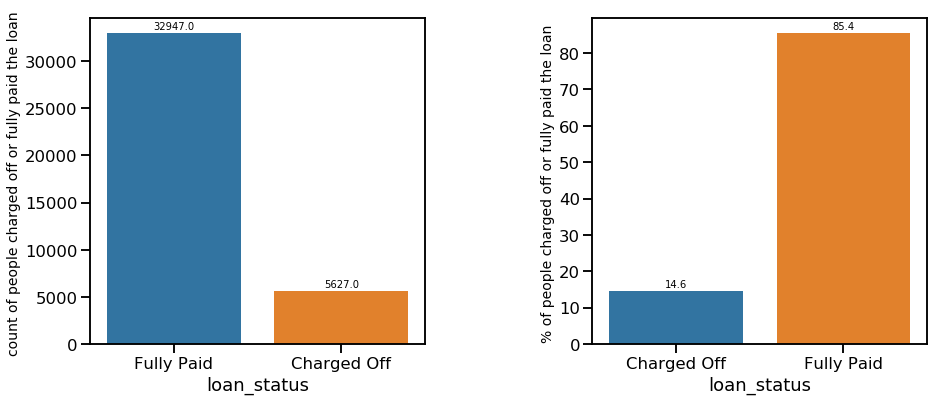

In [51]:
fig = plt.figure(figsize=(15,6))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
ax1 =sns.countplot(loan['loan_status'])
ax1.set_ylabel('count of people charged off or fully paid the loan ', fontsize=14)
showvalues(ax1)
percnt = loan.groupby('loan_status')['funded_amnt_inv'].count()/len(loan)*100
plt.subplot(1,2,2)
ax2 = sns.barplot(x=percnt.index,y=percnt)
ax2.set_ylabel('% of people charged off or fully paid the loan ', fontsize=14)
showvalues(ax2)

#### <font color = 'darkgreen'>From the above analysis we can see that out of the total customers who applied for a loan 5627 (14.6%) of the customers defaulted and 32947(85.4%) of the customers fully paid their loan.

#### Analysing the loan amount to get an idea of the range of loan amount

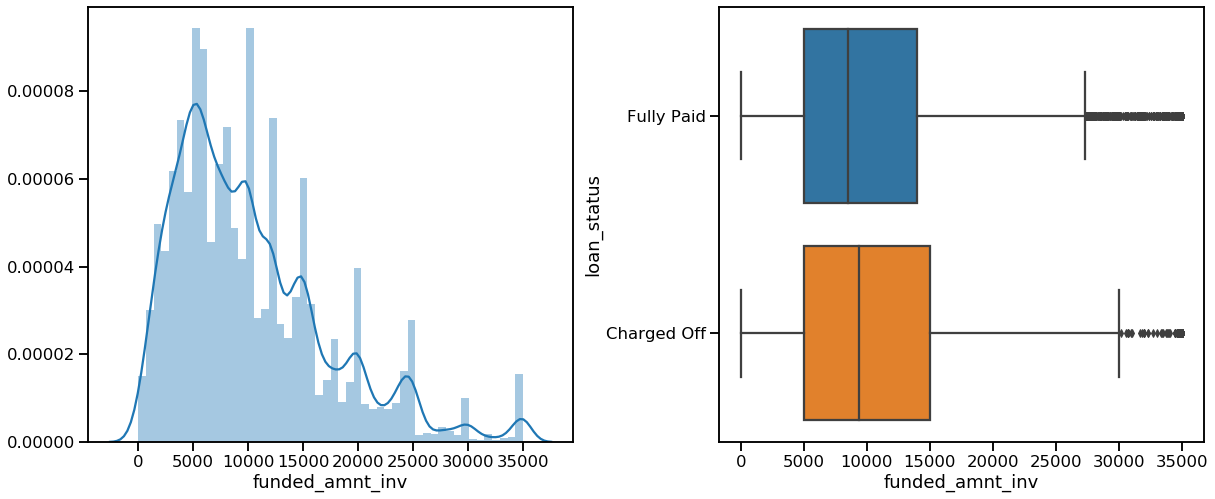

In [52]:
plot_dist_box(loan, 'funded_amnt_inv')

In [53]:
loan['funded_amnt_inv'].describe()

count   38,574.00
mean    10,223.15
std      7,022.58
min          0.00
25%      5,000.00
50%      8,736.65
75%     14,000.00
max     35,000.00
Name: funded_amnt_inv, dtype: float64

In [54]:
loan.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,627.00","10,864.52","7,661.75",0.00,"5,000.00","9,401.21","15,000.00","35,000.00"
Fully Paid,"32,947.00","10,113.61","6,901.68",0.00,"5,000.00","8,500.00","13,950.00","35,000.00"


In [55]:
loan['loan_amnt_rnge']= pd.cut(loan['funded_amnt_inv'], [x for x in range(0, 36000, 5000)],\
       labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

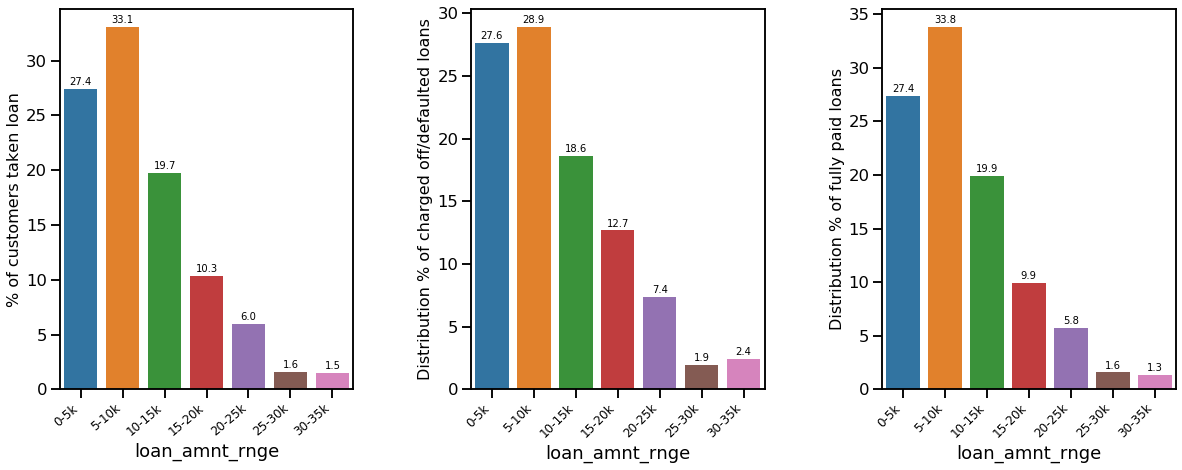

In [56]:
plot_chargedoff_prec(loan,'loan_amnt_rnge')

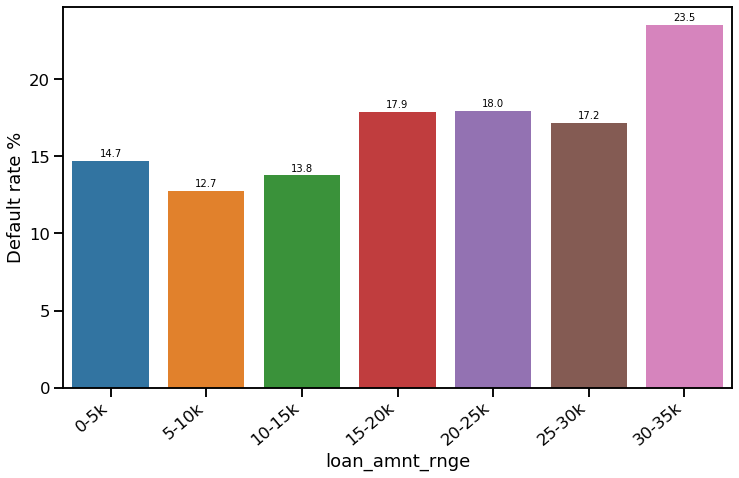

In [57]:
plot_charged_off_analysis(loan,'loan_amnt_rnge')

#### <font color=darkgreen> From the above analysis we can see that 
    The most no of loans (9723) were taken for amounts between USD 5000 and USD 10000 the average(median) being USD 8,736 
    For loan amounts greater than 15k, the average of charged off customers are greater than the total customer average.
    Among the loan amount categories, loan amounts in the range of 30k - 35k has the highest no of defaulters (23.5%)

#### 'Purpose' analysis

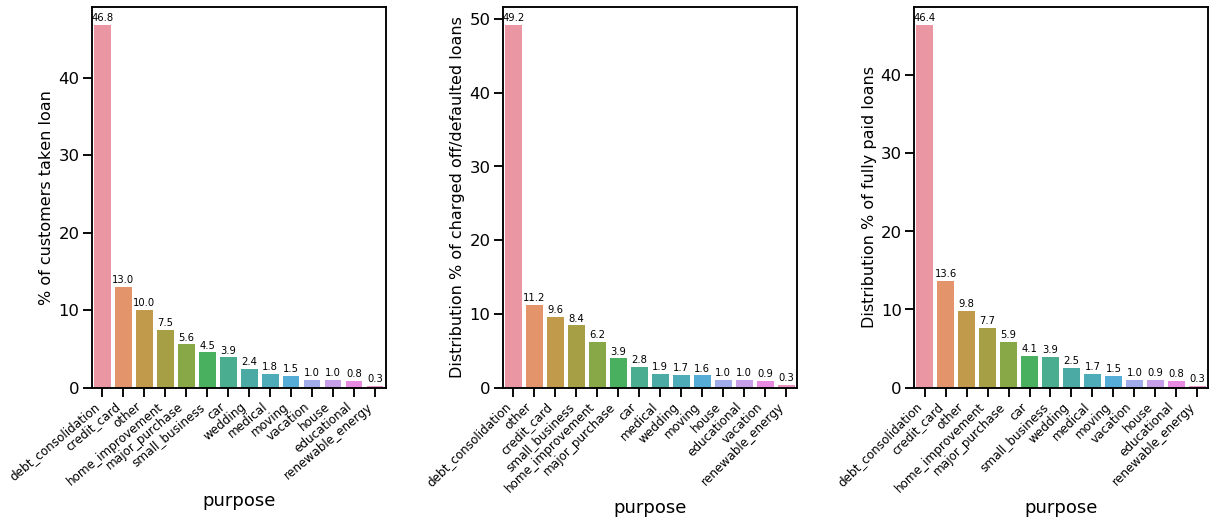

In [58]:
plot_chargedoff_prec(loan,'purpose')

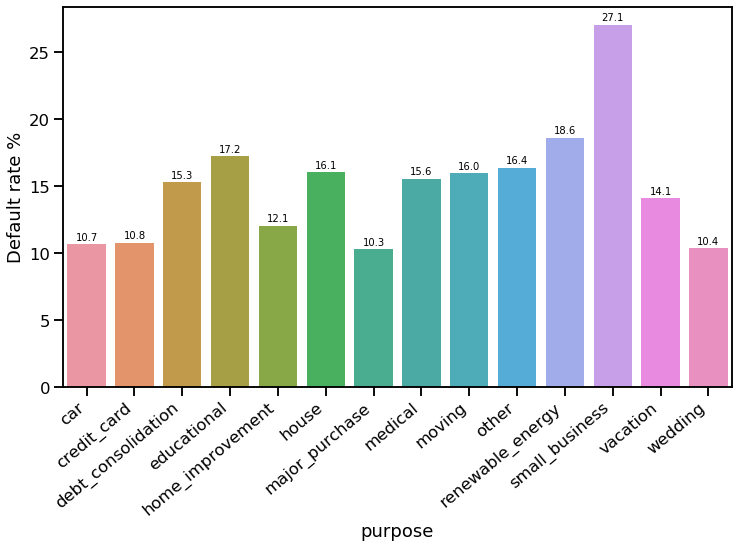

In [59]:
plot_charged_off_analysis(loan,'purpose')

#### <font color=darkgreen> From the above analysis it is clear that 
    The highest no of loans were taken for the purpose of 'debt_consolidation'(46.8%)
    For the purposes such as 'debt_consolidation','small business','other' and 'house', defaulters have a higher average than the total customer average. 
    Among the purposes, 'small businesses' have the the highest no of defaulters(27.1%)

#### Term analysis

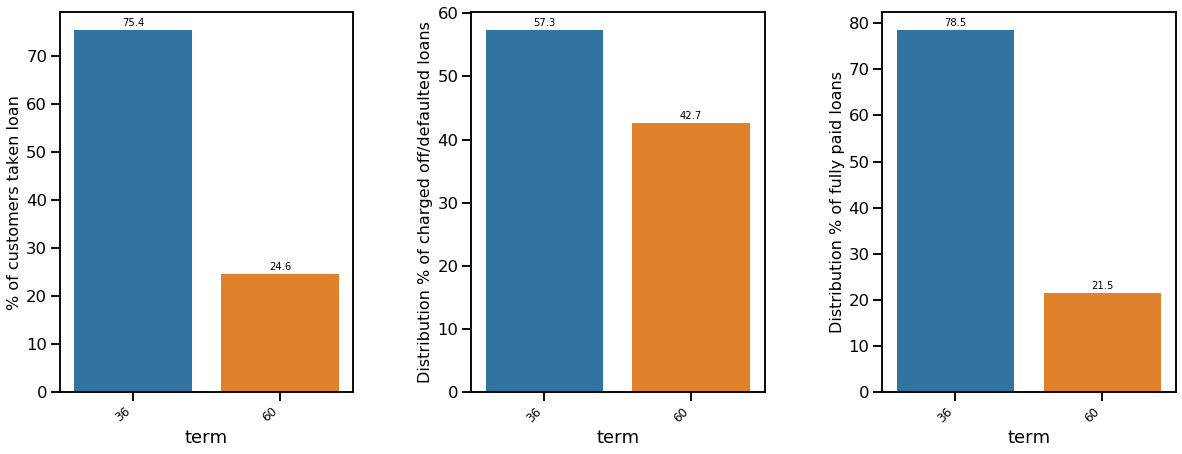

In [60]:
plot_chargedoff_prec(loan,'term')

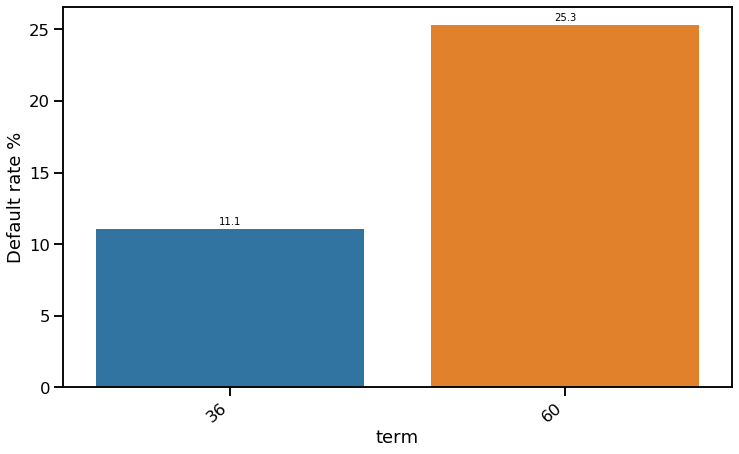

In [61]:
plot_charged_off_analysis(loan,'term')

#### <font color=darkgreen> From the above analysis it is clear that 
    The max no of loans were taken for a period of 36 months(75.4%) 
    For a term of 60 months, the average of defaulters is very much higher than the average of total customers for the same         period.
    Among the terms, 60 months has the highest no of defaulters(25.3%)

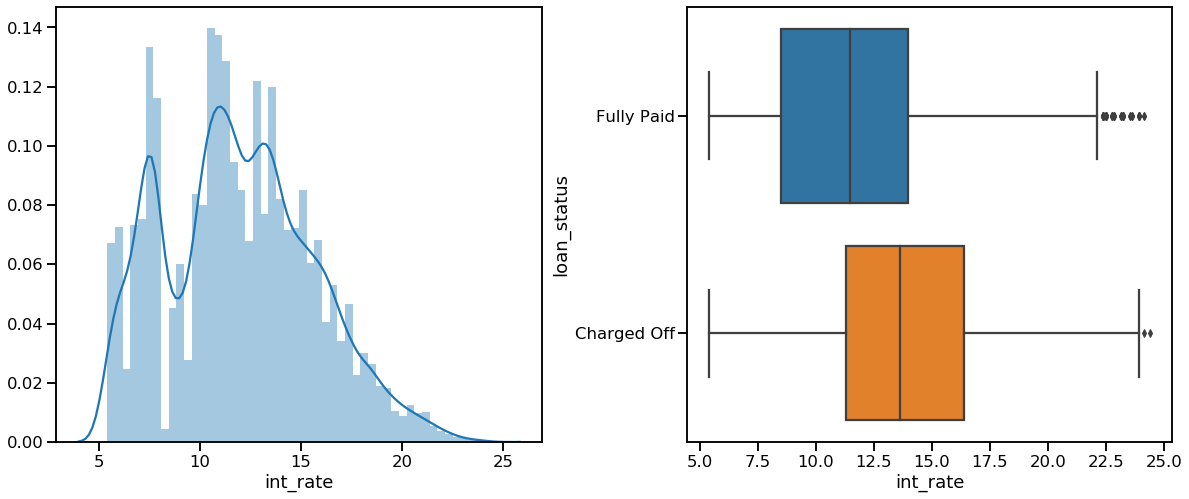

In [62]:
plot_dist_box(loan, 'int_rate')

In [63]:
loan['int_rate'].describe()

count   38,574.00
mean        11.93
std          3.69
min          5.42
25%          8.94
50%         11.71
75%         14.38
max         24.40
Name: int_rate, dtype: float64

In [64]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,627.00",13.82,3.65,5.42,11.31,13.61,16.40,24.40
Fully Paid,"32,947.00",11.61,3.60,5.42,8.49,11.49,13.99,24.11


In [65]:
loan['int_rate_range']= pd.cut(loan['int_rate'], [x for x in range(5, 30, 5)],\
                          labels=[str(x)+'-'+str(x+5) for x in range (5,25,5)])

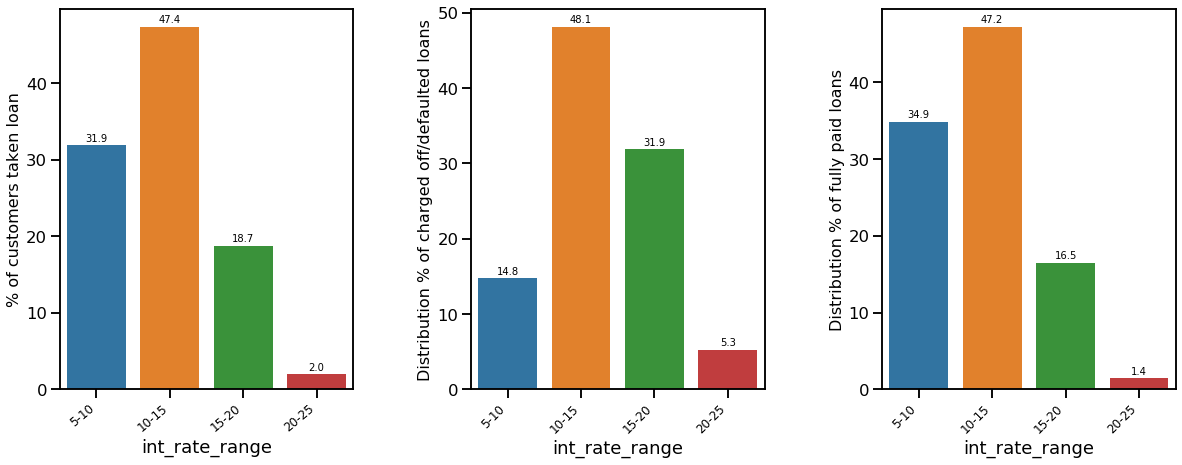

In [66]:
plot_chargedoff_prec(loan,'int_rate_range')

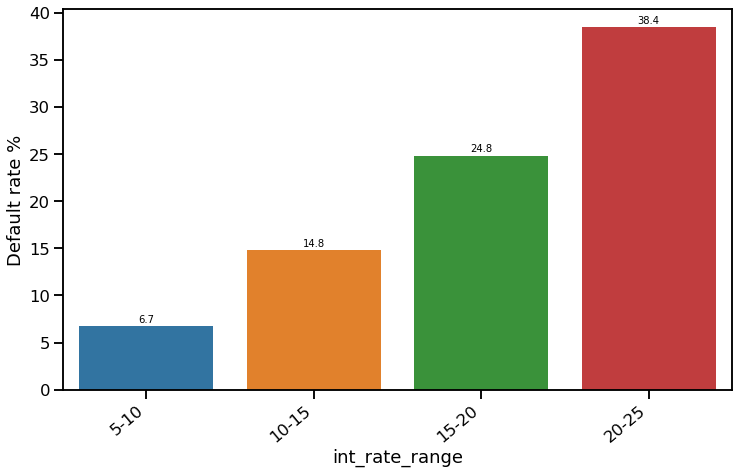

In [67]:
plot_charged_off_analysis(loan,'int_rate_range')

#### <font color=darkgreen> From the above analysis it is clear that
    Most no of loans (47.4%) had an interest rate between 10% and 15% the average(mean) being 11.93%
    For interest rates above 10%, the defaulters average is greater than the total customers average
    Among the interest rates, the highest no of defaulters are for an interest range of 20-25% (38.4%)

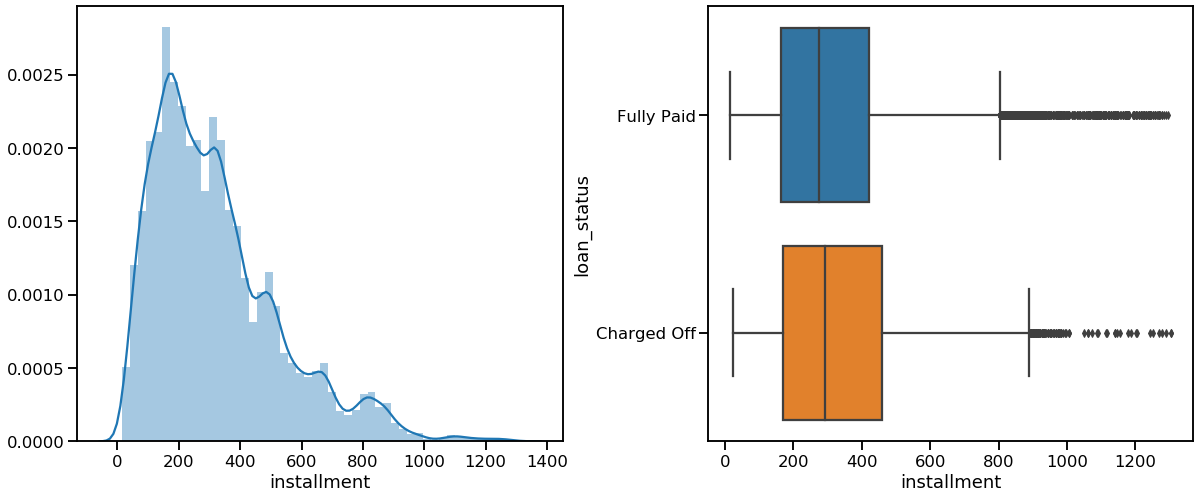

In [68]:
plot_dist_box(loan, 'installment')

In [69]:
loan['installment'].describe()

count   38,574.00
mean       322.48
std        208.64
min         15.69
25%        165.74
50%        277.86
75%        425.55
max      1,305.19
Name: installment, dtype: float64

In [70]:
loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,627.00",336.18,217.05,22.79,168.56,293.87,457.84,"1,305.19"
Fully Paid,"32,947.00",320.14,207.08,15.69,165.32,275.66,420.84,"1,295.21"


In [71]:
loan['installment_range']= pd.cut(loan['installment'], [x for x in range(0, 1600, 200)],\
                          labels=[str(x)+'-'+str(x+200) for x in range (0,1400,200)])

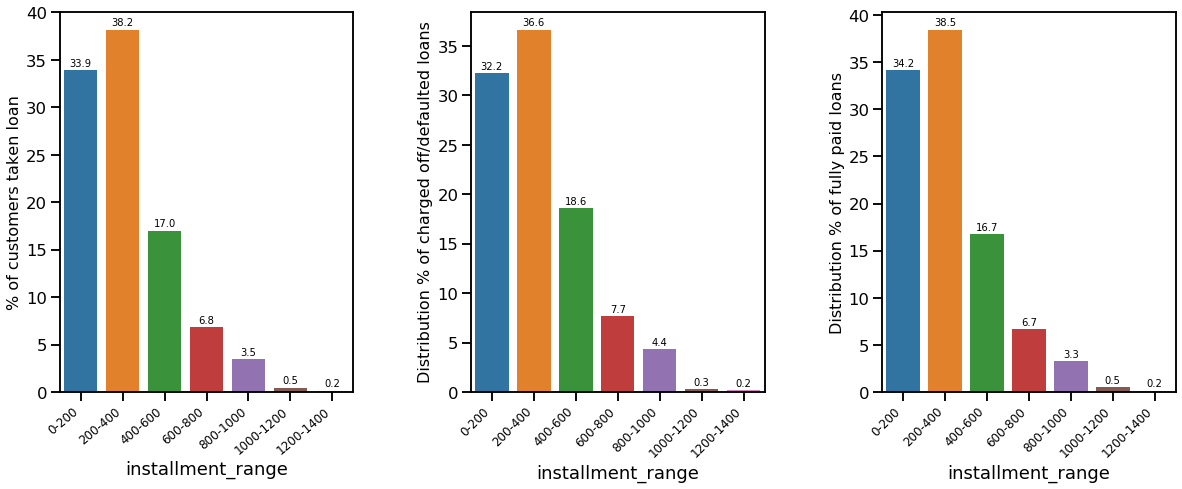

In [72]:
plot_chargedoff_prec(loan,'installment_range')

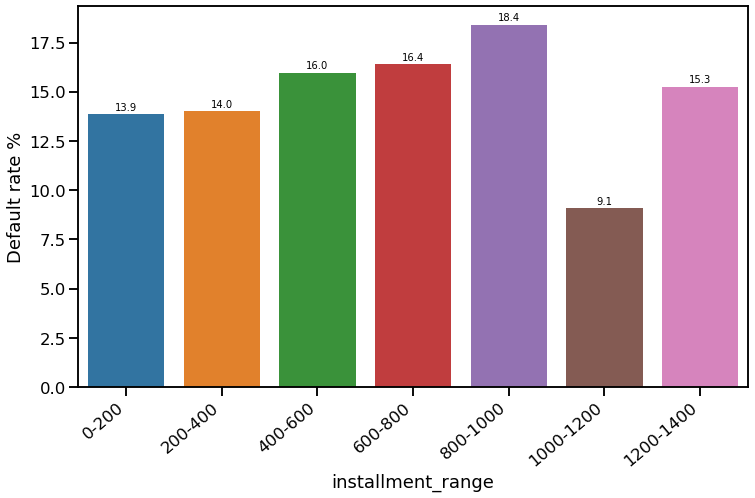

In [73]:
plot_charged_off_analysis(loan,'installment_range')

#### <font color=darkgreen> From the above analysis it is clear that 
    The most no of loans (38.2%) had to be paid back in installment amounts between USD 200 and USD 400 the average(median)         being USD 277.86
    The average of defaulters is higher for installment amounts greater than USD 400
    Among the installment ranges, defaulters are max in the range USD 800 - USD 1000 (18.4%)

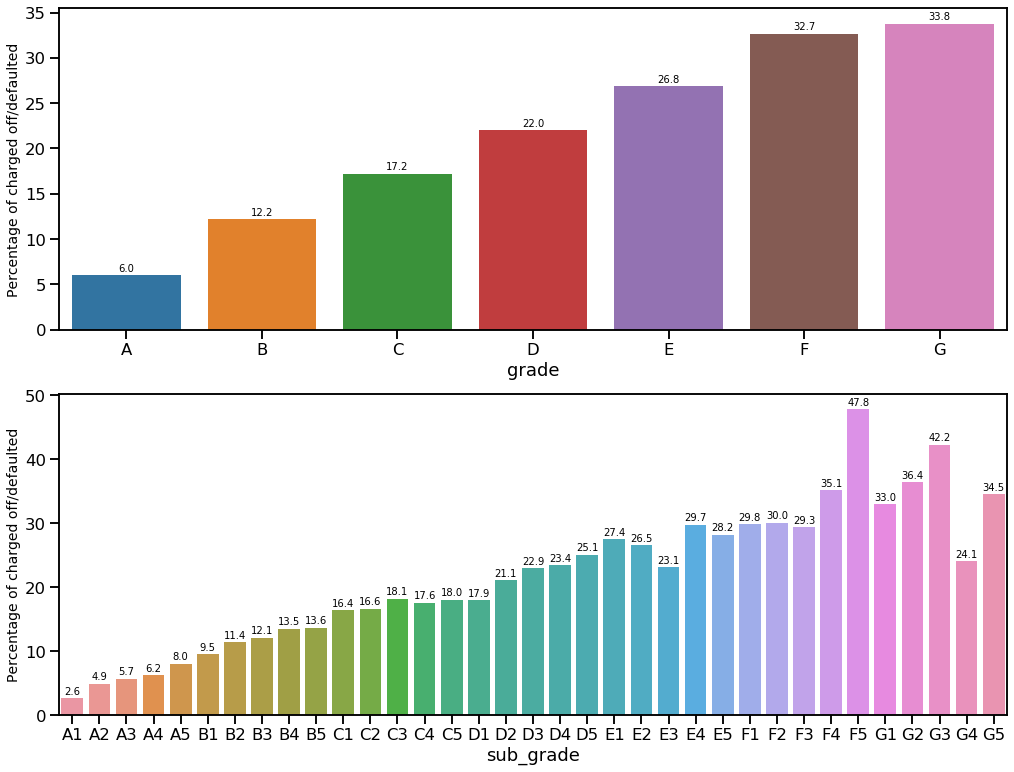

In [74]:
charged_off = loan[loan['loan_status']=='Charged Off']
charged_off_perc_g = (charged_off.groupby('grade').count()['funded_amnt_inv']).sort_values(ascending=False)
loan_perc_g= (loan.groupby('grade').count()['funded_amnt_inv']).sort_values(ascending=False)
perc_g = charged_off_perc_g/loan_perc_g*100
charged_off_perc_sg = (charged_off.groupby('sub_grade').count()['funded_amnt_inv']).sort_values(ascending=False)
loan_perc_sg= (loan.groupby('sub_grade').count()['funded_amnt_inv']).sort_values(ascending=False)
perc_sg = charged_off_perc_sg/loan_perc_sg*100
plt.figure(figsize=(17,13))
plt.subplot(2,1,1)
ax=sns.barplot(perc_g.index,perc_g.values)
ax.set_ylabel('Percentage of charged off/defaulted', fontsize=14)
showvalues(ax)
plt.subplot(2,1,2)
ax=sns.barplot(perc_sg.index,perc_sg.values)
ax.set_ylabel('Percentage of charged off/defaulted', fontsize=14)
showvalues(ax)
plt.show()

#### <font color=darkgreen> From the above analysis we can see that 
    Among the different grades, G has the highest no of defaulters (33.8%)
    Among the different sub grades, F5 (47.8) followed by G3 (42.2) has the highest no of defaulters

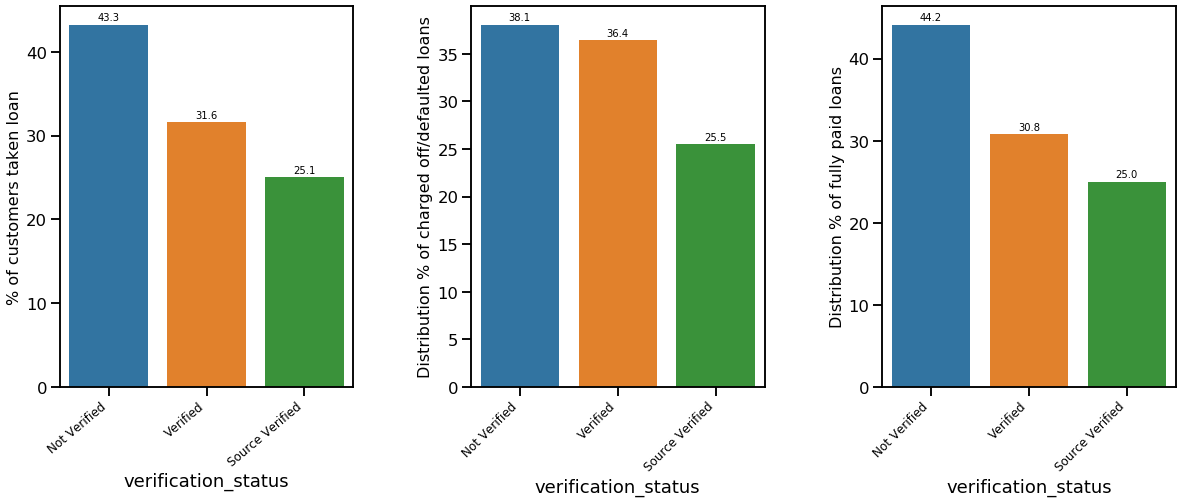

In [75]:
plot_chargedoff_prec(loan,'verification_status')

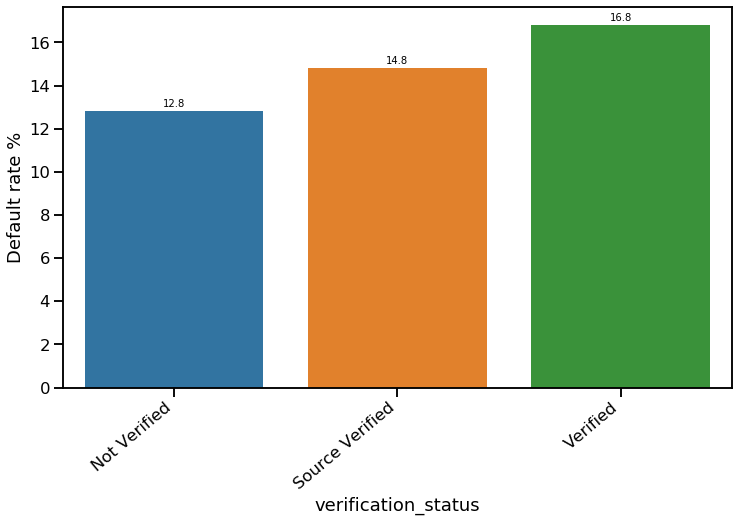

In [76]:
plot_charged_off_analysis(loan,'verification_status')

#### <font color=darkgreen> From the above analysis we can see that 
    For most loans, customer details are Not verified (43.3%)
    The average of defaulters is higher for Verified than the total customer average
    Among the different verification statuses, Verified has the higest no of defaulters(16.8)

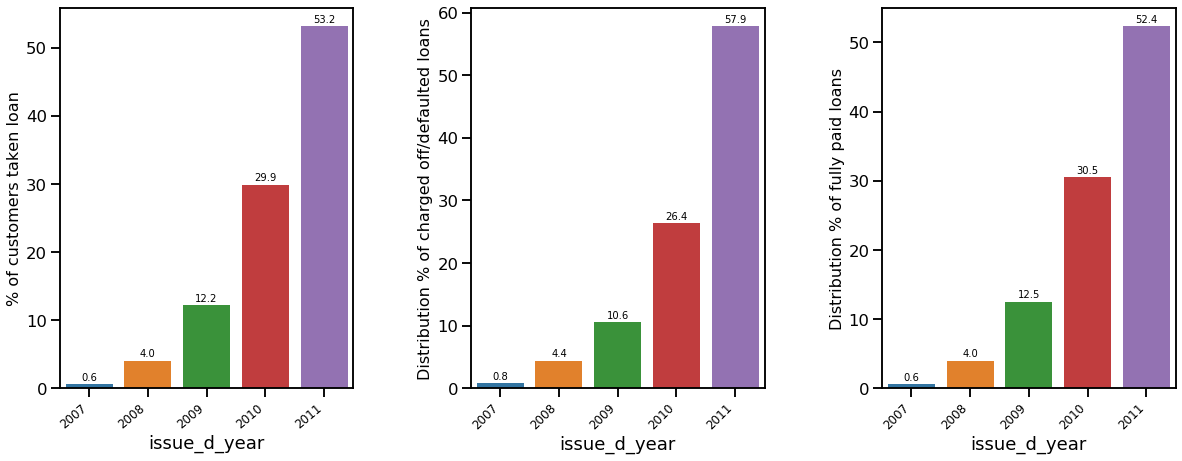

In [77]:
plot_chargedoff_prec(loan,'issue_d_year')

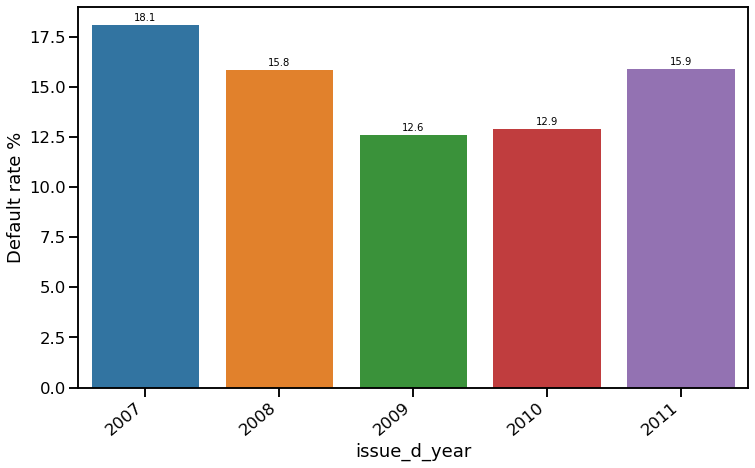

In [78]:
plot_charged_off_analysis(loan,'issue_d_year')

#### <font color=darkgreen> From the above analysis it is clear that
    The max no of loans were issued in the year 2011 (53.2%)
    The reason that the no of loans issued in 2011 is so high maybe because of the economic recession at that time
    Among the years in which loans were issued, the max no defaulters were in the year 2007 (18.1%)

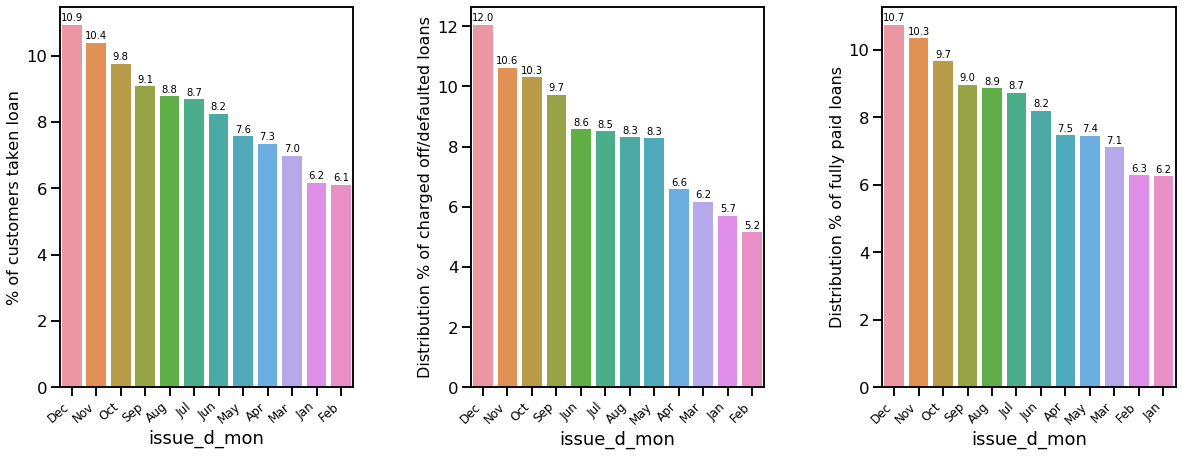

In [79]:
plot_chargedoff_prec(loan,'issue_d_mon')

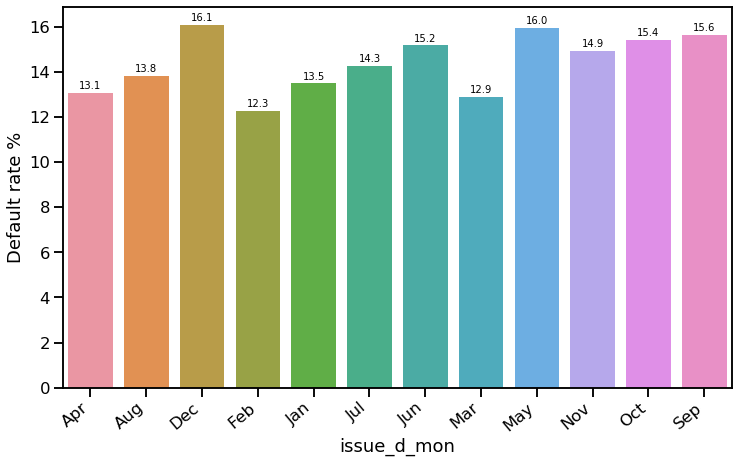

In [80]:
plot_charged_off_analysis(loan,'issue_d_mon')

#### <font color =darkgreen> From the above analysis, we can see that
    The max no of loans (10.9%) were issued in the month of Dec
    Among the different months, the highest no of loans were issued in the months of Dec (16.1%) and May (16.0%)

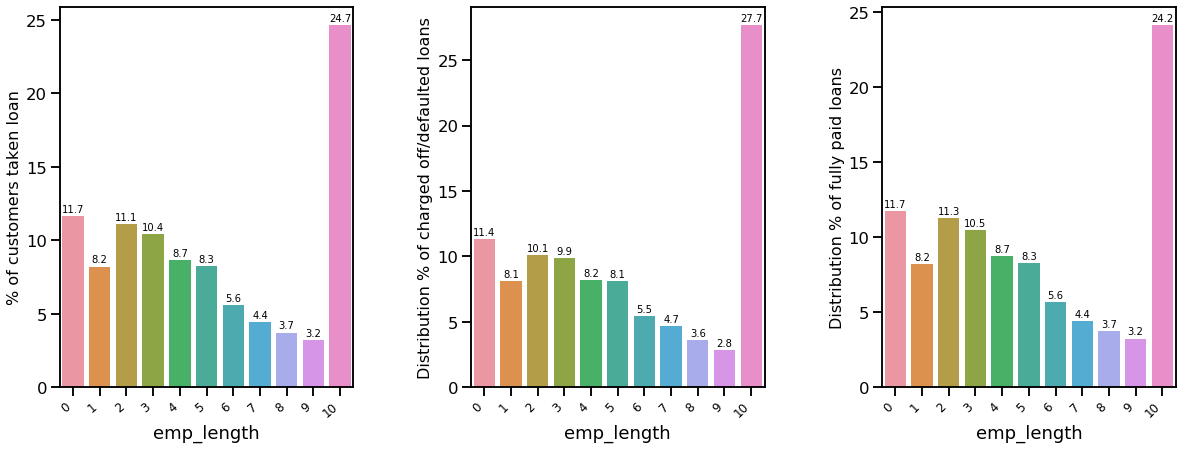

In [81]:
plot_chargedoff_prec(loan,'emp_length')

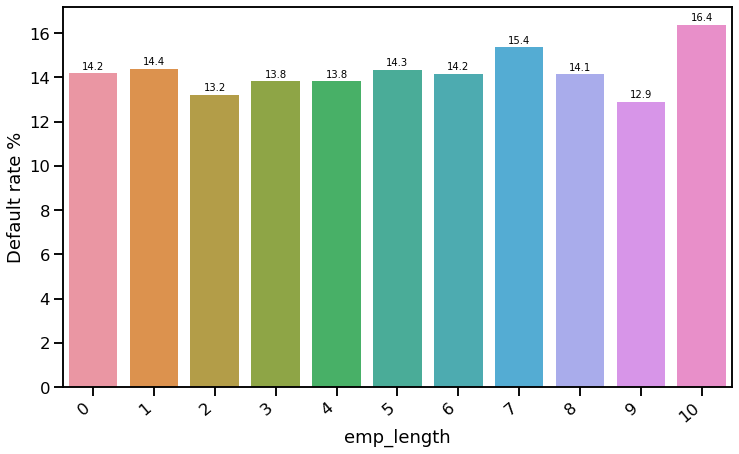

In [82]:
plot_charged_off_analysis(loan,'emp_length')

#### <font color = darkgreen> From the above analysis we can see that
    The max no of loans (24.7%) were taken by people with 10 and above years of experience
    Among the different years of experience, 10 years and above has the highest no of defaulters (16.4%)

#### Annual income analysis

In [83]:
loan.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,627.00","62,427.30","47,776.01","4,080.00","37,000.00","53,000.00","75,000.00","1,250,000.00"
Fully Paid,"32,947.00","69,861.51","66,563.98","4,000.00","41,141.50","60,000.00","84,000.00","6,000,000.00"


#### Removing the outliers above 3 standard deviation to visualise the income distribution

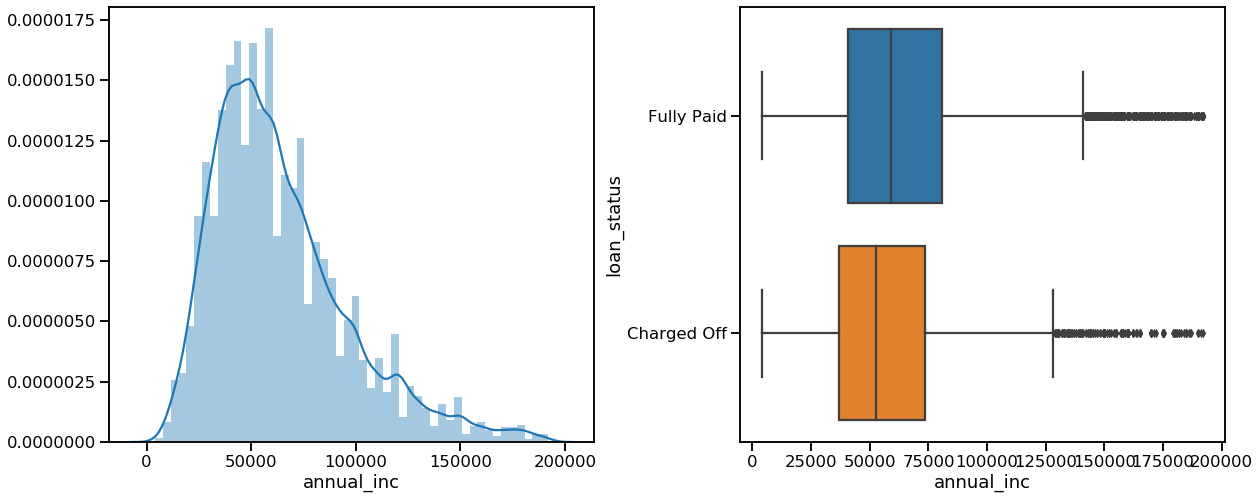

In [84]:
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 2, 1)
ax = sns.distplot(loan[loan['annual_inc']<= loan['annual_inc'].std()*3]['annual_inc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=loan[loan['annual_inc']<= loan['annual_inc'].std()*3]['annual_inc'], y=loan['loan_status'], data=loan)
plt.show()

In [85]:
loan['annual_inc'].describe()

count      38,574.00
mean       68,777.04
std        64,220.01
min         4,000.00
25%        40,000.00
50%        58,860.28
75%        82,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

In [86]:
loan['income_range']= pd.cut(loan['annual_inc'], [x for x in range(0, 225000, 25000)],\
                          labels=[str(x)+'-'+str(x+25)+'k' for x in range (0,200,25)]) 

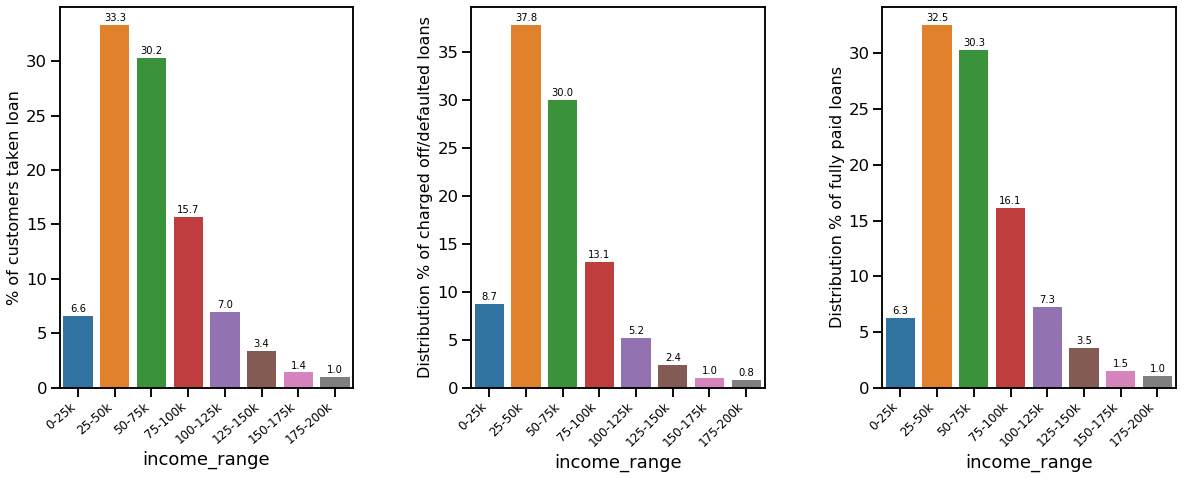

In [87]:
plot_chargedoff_prec(loan,'income_range')

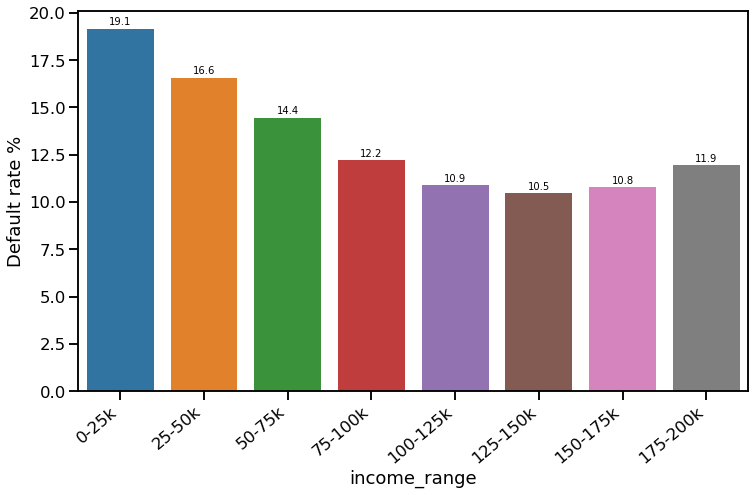

In [88]:
plot_charged_off_analysis(loan,'income_range')

#### <font color=darkgreen> From the above analysis it is clear that
    The most no of loans (33.3%) were taken by customers with an annual income between USD 25k and USD 50k the average (median)  being USD 58,860
    For annual income below 50k, the average of defaulters is higher than the average of the total customers.
    Among the income ranges, 0-25k have the max no of defaulters (19.1%)

#### Home ownership analysis

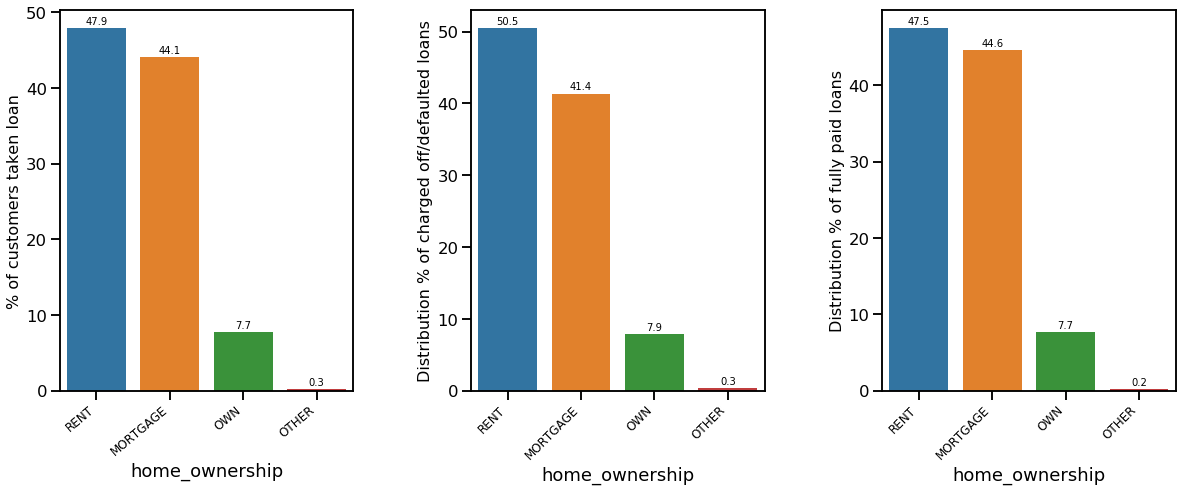

In [89]:
plot_chargedoff_prec(loan,'home_ownership')

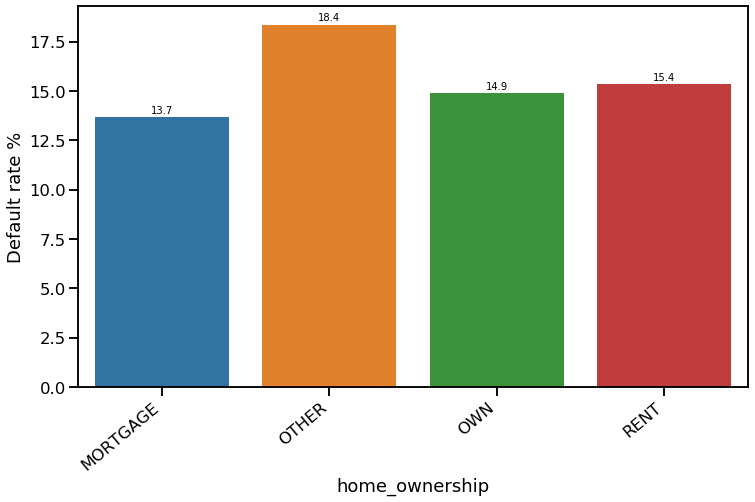

In [90]:
plot_charged_off_analysis(loan,'home_ownership')

#### <font color=darkgreen>From the above analysis it is clear that 
    The max no of people who have taken a loan live in rented houses (47.9%)
    For customers renting homes, the average of defaulters is greater than the total customer average.
    Among home_ownership, 'Other' has the highest no of defaulters (18.4%)

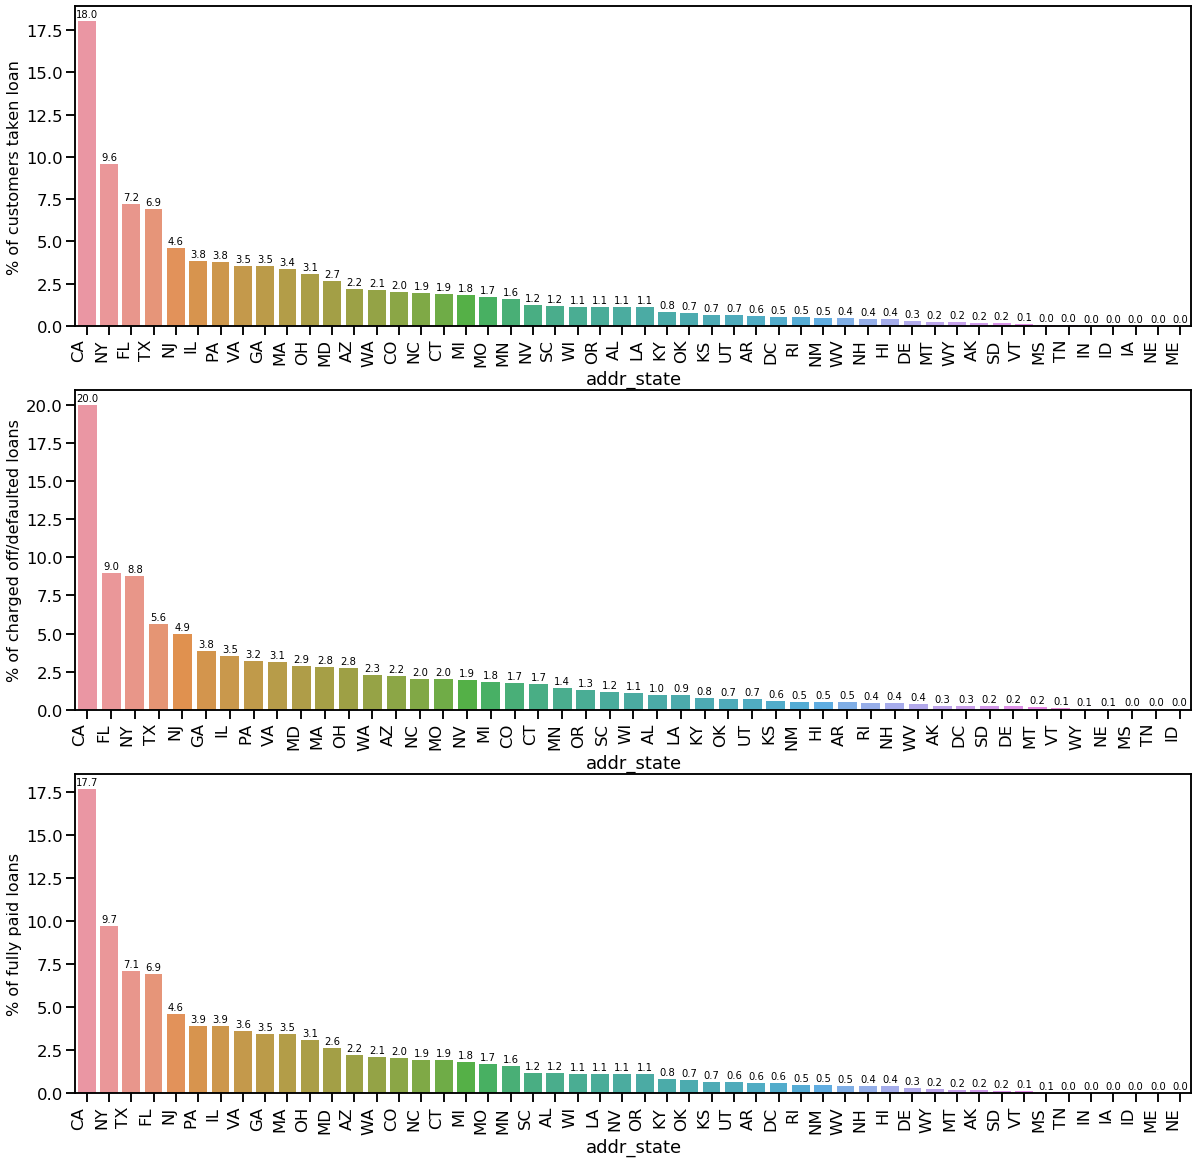

In [91]:
charged_off = loan[loan['loan_status']=='Charged Off']
charged_off_perc = (charged_off.groupby('addr_state').count()['funded_amnt_inv']/len(charged_off)*100).sort_values(ascending=False)
fully_paid = loan[loan['loan_status']=='Fully Paid']
fully_paid_perc = (fully_paid.groupby('addr_state').count()['funded_amnt_inv']/len(fully_paid)*100).sort_values(ascending=False)
loan_perc= (loan.groupby('addr_state').count()['funded_amnt_inv']/len(loan)*100).sort_values(ascending=False)
plt.figure(figsize=(20,20))
plt.subplot(3,1,1)
ax=sns.barplot(loan_perc.index,loan_perc.values)
ax.set_ylabel('% of customers taken loan', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
showvalues(ax)
plt.subplot(3,1,2)
ax=sns.barplot(charged_off_perc.index,charged_off_perc.values)
ax.set_ylabel('% of charged off/defaulted loans', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
showvalues(ax)
plt.subplot(3,1,3)
ax=sns.barplot(fully_paid_perc.index,fully_paid_perc.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_ylabel('% of fully paid loans', fontsize=16)
showvalues(ax)


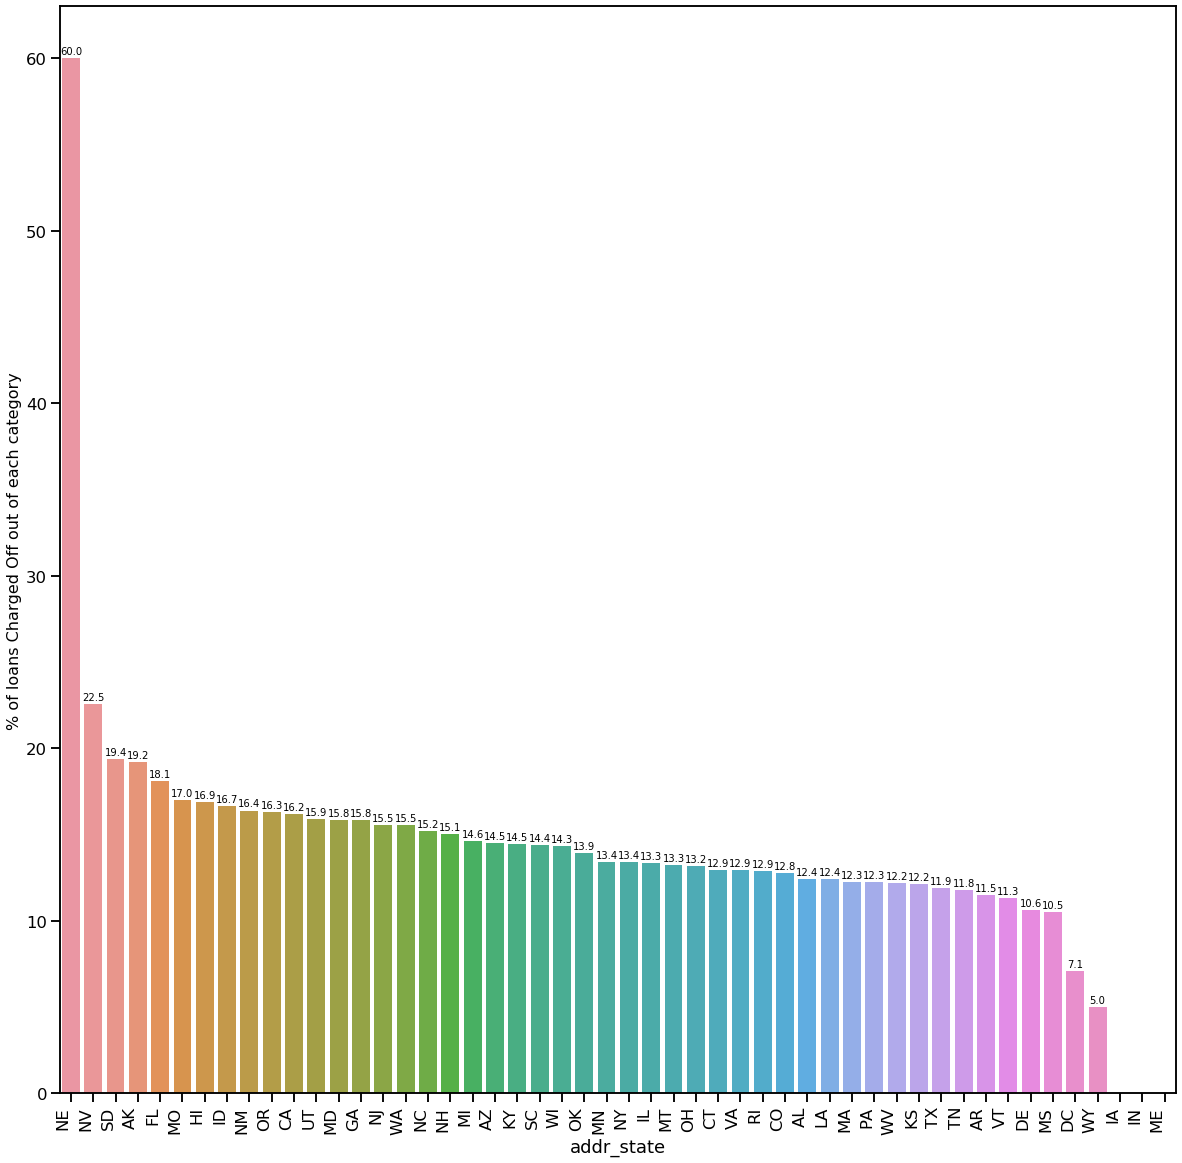

In [92]:
charged_off_perc = (charged_off.groupby('addr_state').count()['funded_amnt_inv'])
loan_perc= (loan.groupby('addr_state').count()['funded_amnt_inv'])
plt.figure(figsize=(20,20))
perc = (charged_off_perc/loan_perc*100).sort_values(ascending=False)
ax=sns.barplot(perc.index,perc.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_ylabel('% of loans Charged Off out of each category', fontsize=16)
showvalues(ax)

#### <font color=darkgreen> From the above analysis we can see that
    The max no of people who have taken a loan are from CA (18%)
    Among the different states, NE has the highest no of defaulters (60%), followed by NV (22.5%)
    Only 5 people rom NE has applied for a loan, hence the high default rate

#### Zip_code analysis

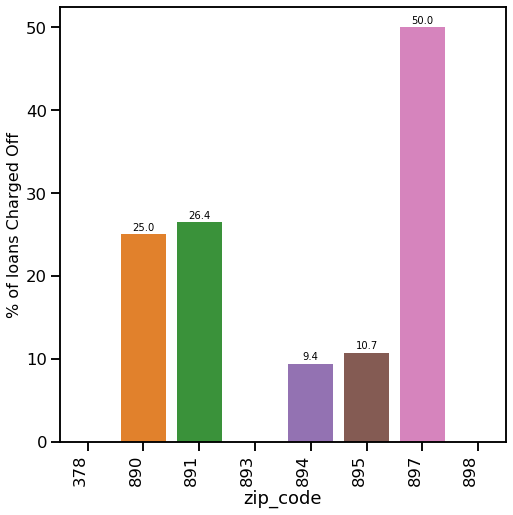

In [151]:
charged_off_perc = (charged_off[charged_off['addr_state']=='NV'].groupby('zip_code').count()['funded_amnt_inv'])
loan_perc= (loan[loan['addr_state']=='NV'].groupby('zip_code').count()['funded_amnt_inv'])
plt.figure(figsize=(8,8))
perc = (charged_off_perc/loan_perc*100).sort_values(ascending=False)
ax=sns.barplot(perc.index,perc.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_ylabel('% of loans Charged Off', fontsize=16)
showvalues(ax)

### <font color=darkgreen>From analysing the zip codes for NV, we can see that
    The highest no of defaulters in NV (50%) are from the zip code address starting with 897 

#### Analysing debt-to-income ratio (dti)

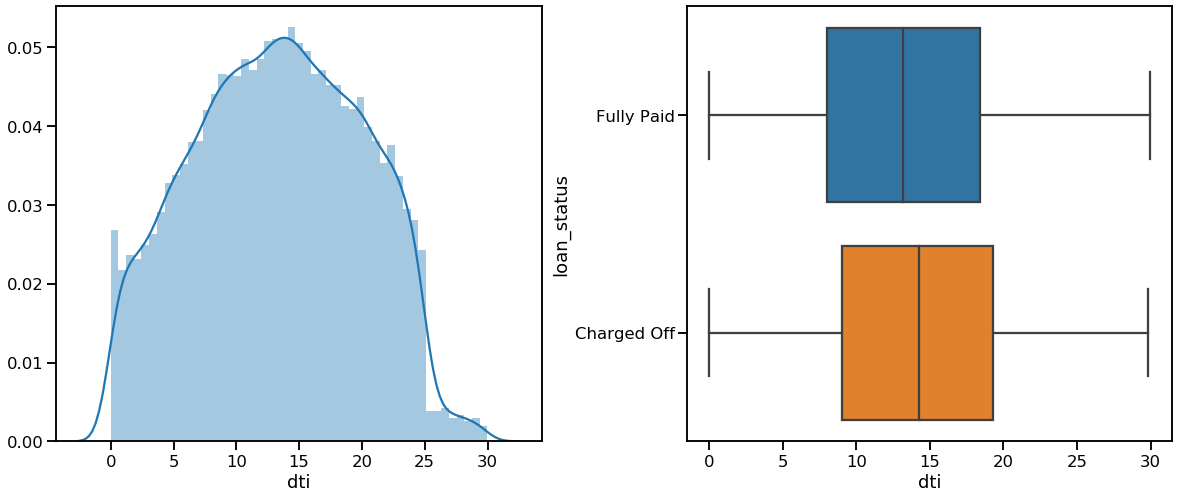

In [93]:
plot_dist_box(loan, 'dti')

In [94]:
loan['dti'].describe()

count   38,574.00
mean        13.27
std          6.67
min          0.00
25%          8.13
50%         13.37
75%         18.56
max         29.99
Name: dti, dtype: float64

In [95]:
loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"5,627.00",14.00,6.59,0.00,9.05,14.29,19.29,29.85
Fully Paid,"32,947.00",13.15,6.68,0.00,7.98,13.20,18.39,29.99


In [96]:
loan['dti_range']= pd.cut(loan['dti'], [x for x in range(0, 35, 5)],\
                          labels=[str(x)+'-'+str(x+5) for x in range (0, 30, 5)])

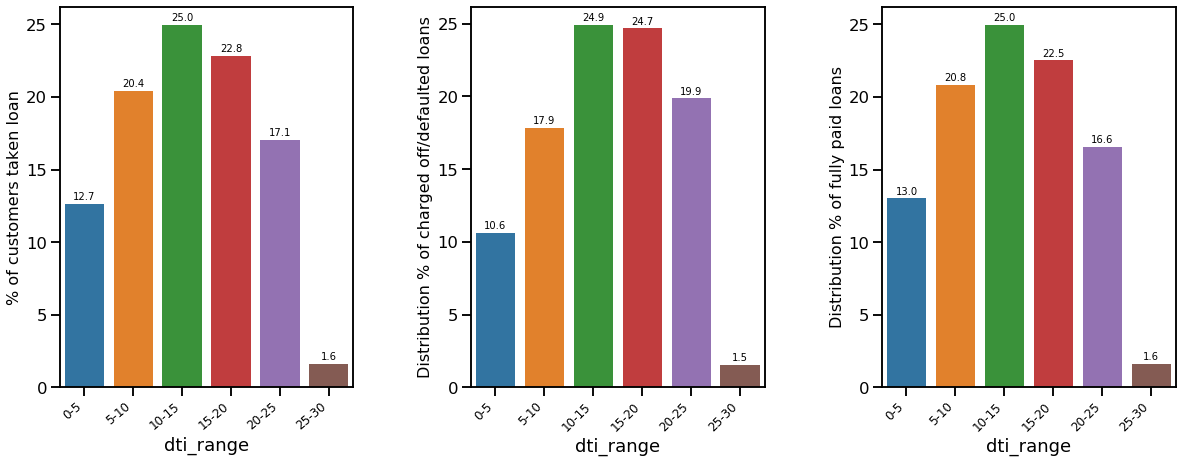

In [97]:
plot_chargedoff_prec(loan,'dti_range')

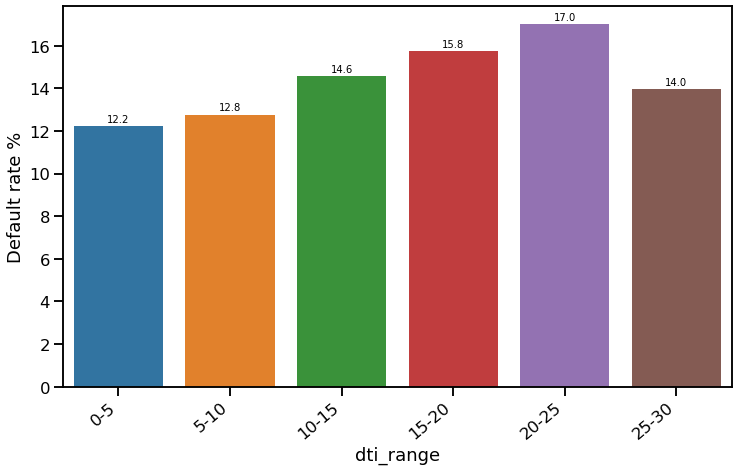

In [98]:
plot_charged_off_analysis(loan,'dti_range')

#### <font color=darkgreen> From the above analysis it is clear that 
    Most no of customers have a dti ratio between 11 and 15 (25%)
    For a dti range of 11-25, especially within the range of 16-25, the average of defaulters is greater than the total customer average
    Among the dti range, 20-25 has the highest no of defaulters (17%)

## <font color=darkgreen> Inferences:

### From the above  analysis it becomes evident that the following attributes are strong indicators of default:
    addr_state
    sub_grade
    int_rate
    grade
    purpose
    term
    funded_amnt_inv
    installment
    annual_inc
    issue_d_year
    dti
    home_ownership
    verification
    issue_d_mon
    emp_length
    
    

## <font color=darkgreen>Bivariate analysis

In [99]:
loan_matrix = loan
loan_matrix['loan_status'] = loan_matrix['loan_status'].replace(['Fully Paid','Charged Off'],[0,1]).astype(int)

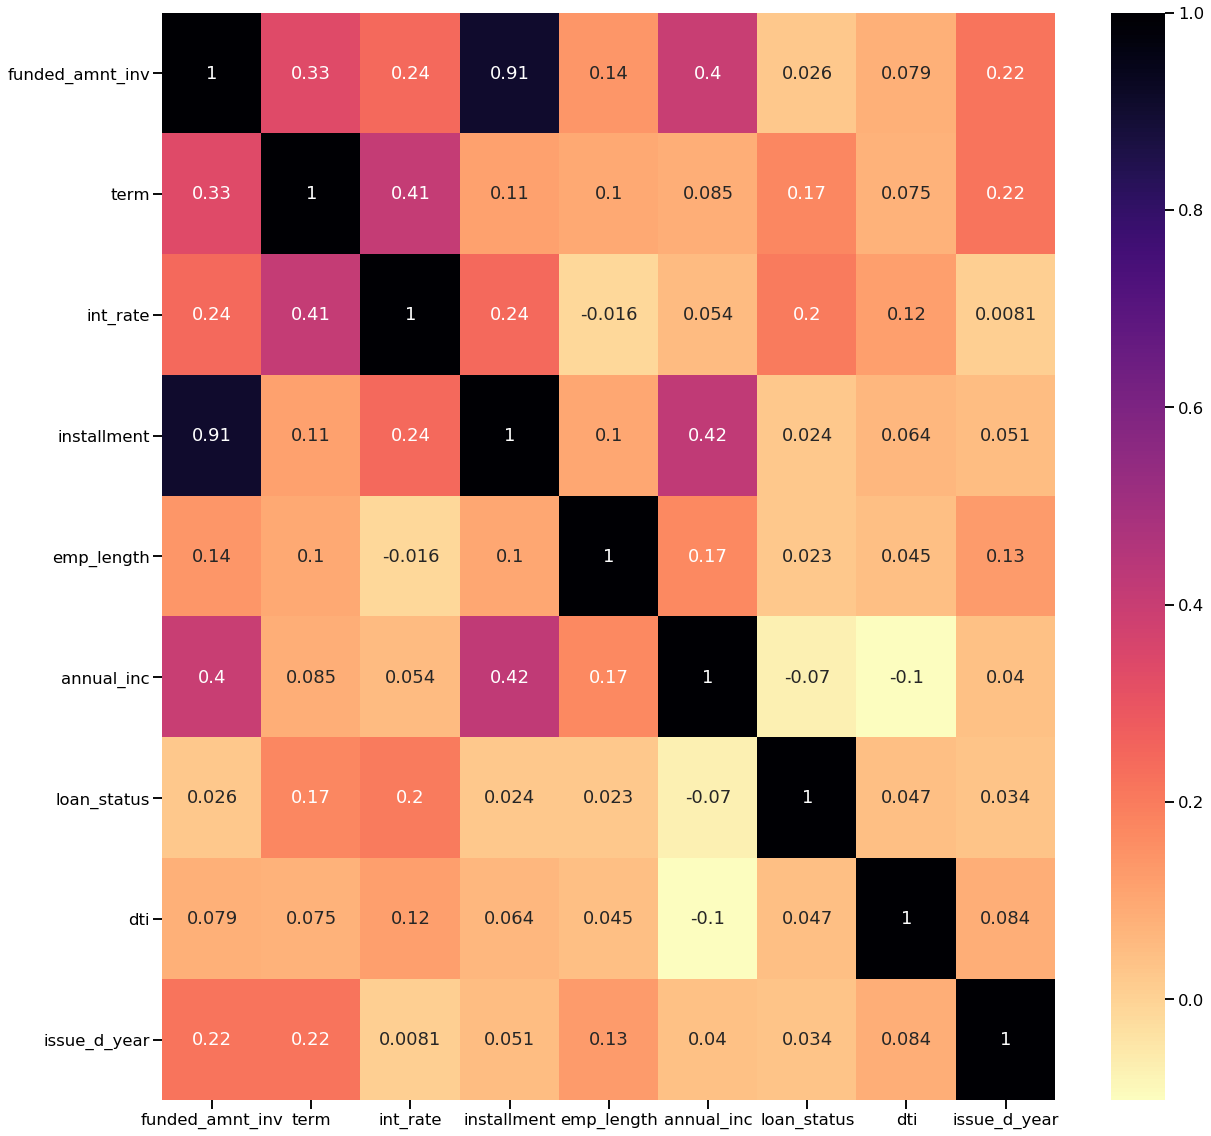

In [100]:
plt.figure(figsize=(20,20))
corr = loan_matrix.corr(method = 'spearman')
sns.heatmap(corr,cmap='magma_r',annot=True)

In [101]:
loan_matrix = loan[['funded_amnt_inv','int_rate','installment','emp_length','annual_inc','loan_status','dti','issue_d_year']]

#### Interest rate vs grade and sub grade

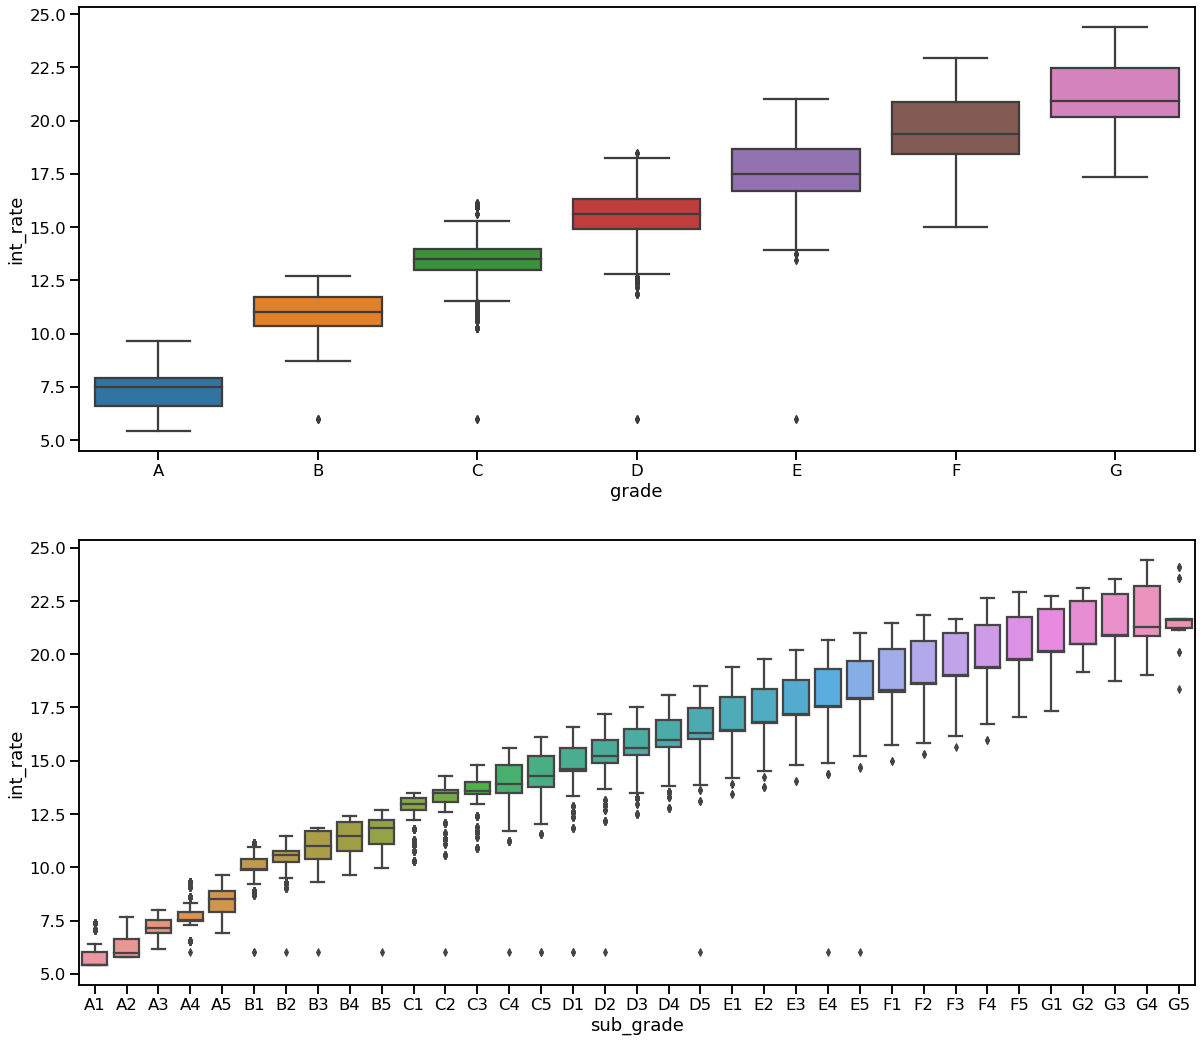

In [163]:
loan_sorted_1= loan[['grade','int_rate']].sort_values('grade')
loan_sorted_2= loan[['sub_grade','int_rate']].sort_values('sub_grade')
plt.figure(figsize=(20,18))
plt.subplot(2,1,1)
sns.boxplot(y='int_rate', x='grade', data=loan_sorted_1)
plt.subplot(2,1,2)
sns.boxplot(y='int_rate', x='sub_grade', data=loan_sorted_2)

#### <font color = darkgreen> From the above analysis we can see that as the sub grade increases interest rate also increases

#### home ownership with int_rate and  term

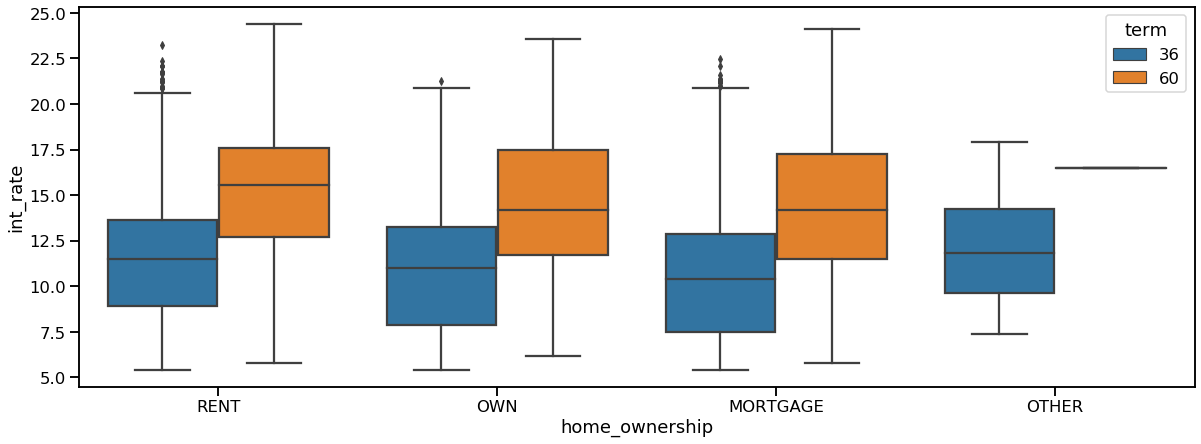

In [193]:
plt.figure(figsize=(20,7))
sns.boxplot(loan['home_ownership'],loan['int_rate'],hue=loan['term'])

#### <font color = darkgreen> From the above analysis we can that 
    Customers home_ownership = Rent has more interest rate charged as compared to own and mortage.

## THE END